## Experience Analytics

In [1]:
import os
import sys
sys.path.insert(0,os.path.dirname(os.getcwd()))

In [2]:
from scripts.userAnalysis import UserAnalysis
from scripts.database import DataBaseConnection
from scripts.experienceAnalysis import ExperienceAnalytics

#### Database connection

In [3]:
host=os.getenv("DB_HOST")
database=os.getenv("DB_DATABASE")
user=os.getenv("DB_USER")
password=os.getenv("DB_PASSWORD")
port=os.getenv("DB_PORT")
db=DataBaseConnection(host, database, user,password,port)

In [4]:
user_analysis=UserAnalysis()

In [5]:
connection=user_analysis.creating_connection(db)

Connection to PostgreSQL successful


#### Reading data

In [6]:
data=user_analysis.read_data(db, connection)

Connection to PostgreSQL closed


In [7]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [8]:
data.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [9]:
data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


#### Data preprocessing

In [10]:
processingData=user_analysis.handleMissing(data)

In [11]:
processingData.isnull().sum()

Start                             0
End                               0
Last Location Name                0
Handset Manufacturer              0
Handset Type                      0
Bearer Id                         0
Start ms                          0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Nb of sec with Vol DL < 6250

In [12]:
df_cleand=user_analysis.feature_engineering(processingData)

In [13]:
df_cleand.head()

,Last Location Name,Handset Manufacturer,Handset Type,Bearer Id,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Session_Duration
62,D72939C,Huawei,Huawei B528S-23A,1.304243e+19,336160.0,2.082018e+14,3.376353e+10,8.637690e+13,52.000000,11.000000,...,8632677.0,576998244.0,9724918.0,446979790.0,14067203.0,46797611.0,632600264.0,1.432000e+03,759658.664811,336120.0
65,L11120C,Samsung,Samsung Galaxy S6 Edge (Sm-G925X),1.311448e+19,320001.0,2.082017e+14,3.366364e+10,3.564211e+13,30.000000,3.000000,...,624225.0,552413006.0,1112977.0,142091905.0,1299874.0,18261248.0,597244693.0,2.080991e+07,759658.664811,320040.0
66,L11864B,Samsung,Samsung Galaxy S9 Sm-G960F Ds,7.349883e+18,316419.0,2.082019e+14,3.366010e+10,3.579881e+13,109.795706,17.662883,...,13789484.0,507419487.0,9991757.0,348565519.0,3391925.0,50065095.0,538809148.0,2.080991e+07,759658.664811,316440.0
67,D73388C,Samsung,Samsung Galaxy A6 Sm-A600Fn Ds,1.311448e+19,329003.0,2.082021e+14,3.365079e+10,3.575751e+13,109.795706,17.662883,...,6144270.0,124816679.0,1214873.0,483852157.0,6057834.0,29436200.0,162196572.0,2.080991e+07,759658.664811,328980.0
68,T72937C,Samsung,Samsung Galaxy A8 (2018),1.304243e+19,314961.0,2.082014e+14,3.366274e+10,3.528141e+13,853.000000,2.000000,...,10650621.0,48891264.0,13607386.0,525208955.0,6472727.0,50576233.0,93360974.0,7.659680e+05,31267.000000,315000.0


In [14]:
df_cleand.columns

Index(['Last Location Name', 'Handset Manufacturer', 'Handset Type',
       'Bearer Id', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI',
       'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)',
       'Tot

#### Experience analysis

In [15]:
experienceData=ExperienceAnalytics(df_cleand)

##### ***Aggregation per Customer***

In [16]:
aggregatedData=experienceData.aggregation_per_customer()

   MSISDN/Number  TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0   3.360100e+10                 2.080991e+07                759658.664811   
1   3.360100e+10                 2.080991e+07                759658.664811   
2   3.360100e+10                 2.080991e+07                759658.664811   
3   3.360101e+10                 1.066000e+03                759658.664811   
4   3.360101e+10                 2.080991e+07                759658.664811   

   Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
0        46.000000         0.000000                     37.0   
1        30.000000         1.000000                     48.0   
2       109.795706        17.662883                     48.0   
3        69.000000        15.000000                    204.0   
4        28.000000         0.000000                     23.0   

   Avg Bearer TP UL (kbps)                    Handset Type  \
0                     39.0  Huawei P20 Lite Huawei Nova 3E   
1                     

In [17]:
aggregatedData

,MSISDN/Number,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Handset Type,Avg TCP Retransmission,Avg RTT,Avg Throughput
0,3.360100e+10,2.080991e+07,759658.664811,46.000000,0.000000,37.000000,39.00000,Huawei P20 Lite Huawei Nova 3E,1.078479e+07,23.000000,38.000000
1,3.360100e+10,2.080991e+07,759658.664811,30.000000,1.000000,48.000000,51.00000,Apple iPhone 7 (A1778),1.078479e+07,15.500000,49.500000
2,3.360100e+10,2.080991e+07,759658.664811,109.795706,17.662883,48.000000,49.00000,undefined,1.078479e+07,63.729294,48.500000
3,3.360101e+10,1.066000e+03,759658.664811,69.000000,15.000000,204.000000,44.00000,Apple iPhone 5S (A1457),3.803623e+05,42.000000,124.000000
4,3.360101e+10,2.080991e+07,759658.664811,28.000000,0.000000,23.000000,40.00000,Apple iPhone Se (A1723),1.078479e+07,14.000000,31.500000
...,...,...,...,...,...,...,...,...,...,...,...
96471,3.378997e+10,2.080991e+07,759658.664811,48.000000,5.000000,23.000000,44.00000,Apple iPhone 6S (A1688),1.078479e+07,26.500000,33.500000
96472,3.378998e+10,2.080991e+07,759658.664811,109.795706,17.662883,42.000000,52.00000,undefined,1.078479e+07,63.729294,47.000000
96473,3.379000e+10,2.150440e+05,3001.000000,42.000000,10.000000,9978.000000,387.00000,Huawei Honor 9 Lite,1.090225e+05,26.000000,5182.500000
96474,3.379000e+10,2.080991e+07,759658.664811,34.000000,6.000000,68.000000,48.00000,Apple iPhone 8 Plus (A1897),1.078479e+07,20.000000,58.000000


In [18]:
experienceData.compute_top_bottom_frequent(aggregatedData)

Top 10 TCP DL Retransmission: 15646    339178976.0
71321    323967418.0
61838    315373780.0
37282    301392685.0
30089    269773532.0
88997    267243443.0
45164    265374200.0
87069    248478163.0
55016    242140288.0
30113    224705266.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
Bottom 10 TCP DL Retransmission: 63290     6.0
80203     6.0
56686     8.0
54282    11.0
84277    12.0
85186    12.0
24615    13.0
10999    30.0
13760    31.0
14075    31.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
Most Frequent TCP DL Retransmission: TCP DL Retrans. Vol (Bytes)
2.080991e+07    60274
1.330000e+03      237
2.660000e+03      128
9.200000e+01      108
3.800000e+01       96
1.040562e+07       95
1.318000e+03       78
3.990000e+03       71
1.040498e+07       64
5.320000e+03       61
Name: count, dtype: int64


In [19]:
sampedData=aggregatedData.head(10)

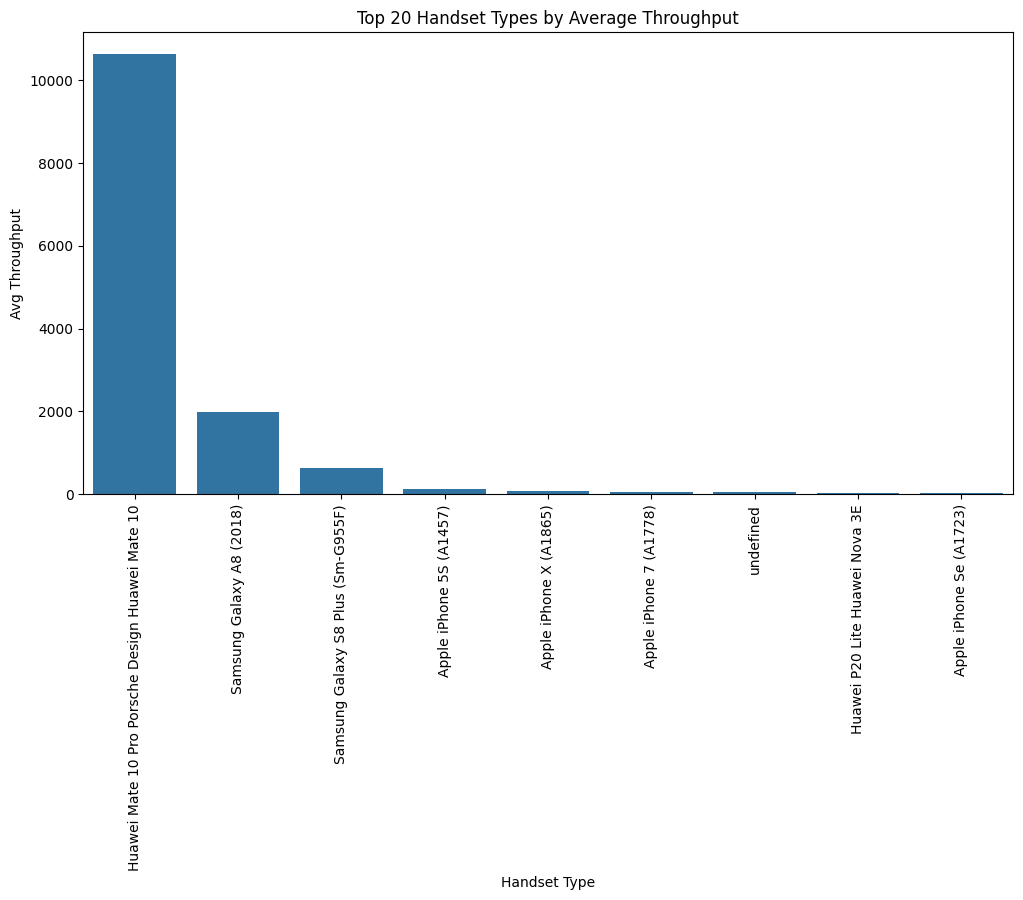

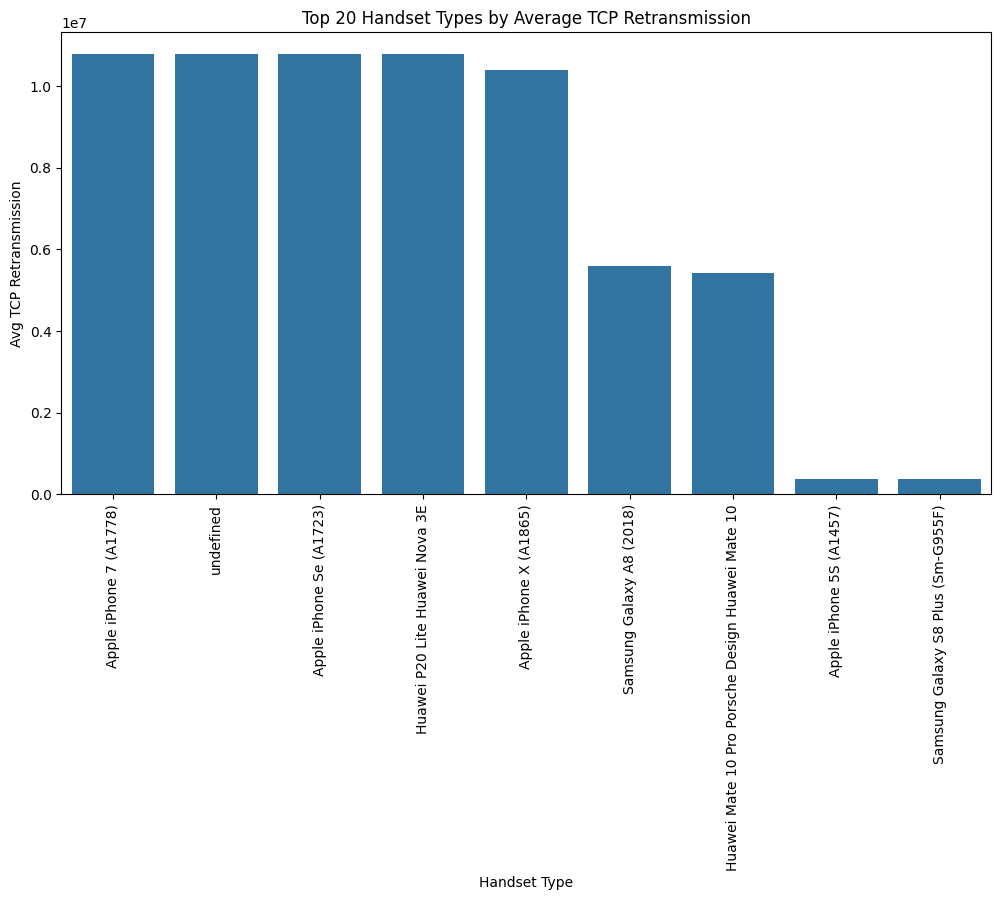

In [20]:
experienceData.visualize_distribution(sampedData)

   Cluster     Avg RTT  Avg TCP Retransmission  Avg Throughput
0        0   37.636281            1.060095e+07      532.823307
1        1   52.440454            1.935824e+06    12476.492872
2        2  454.033832            2.682012e+06     3190.607460


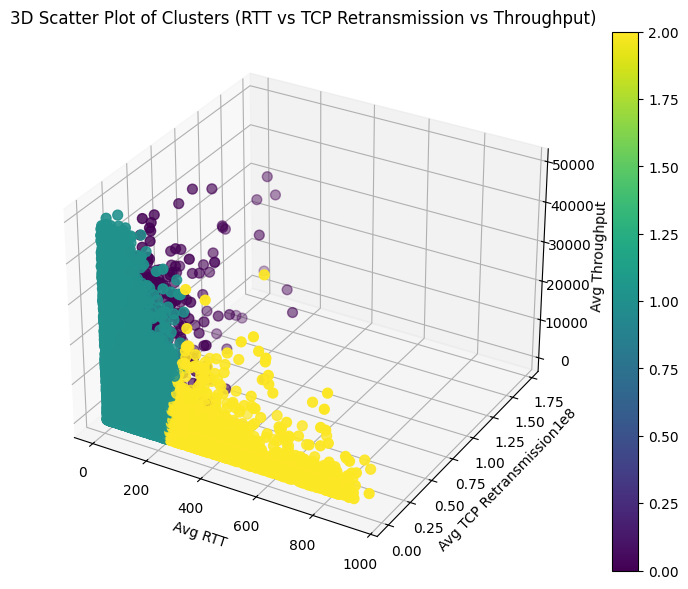

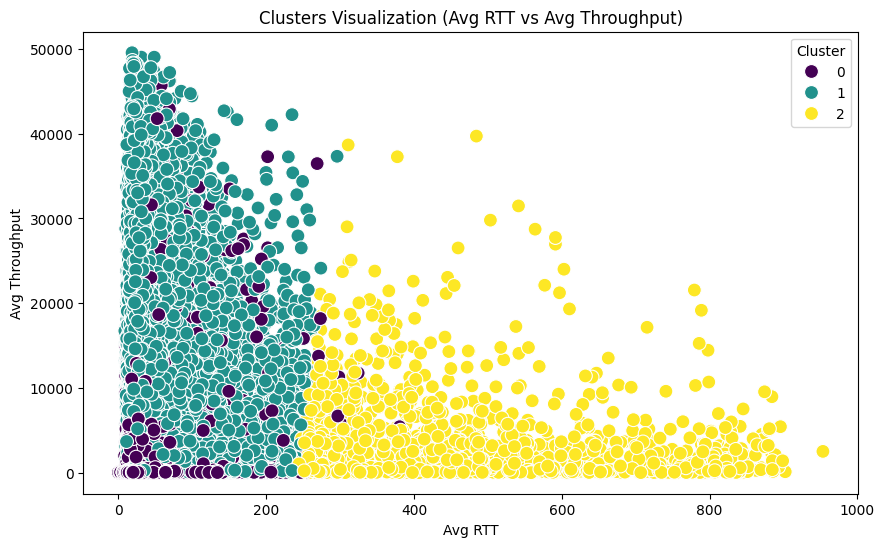

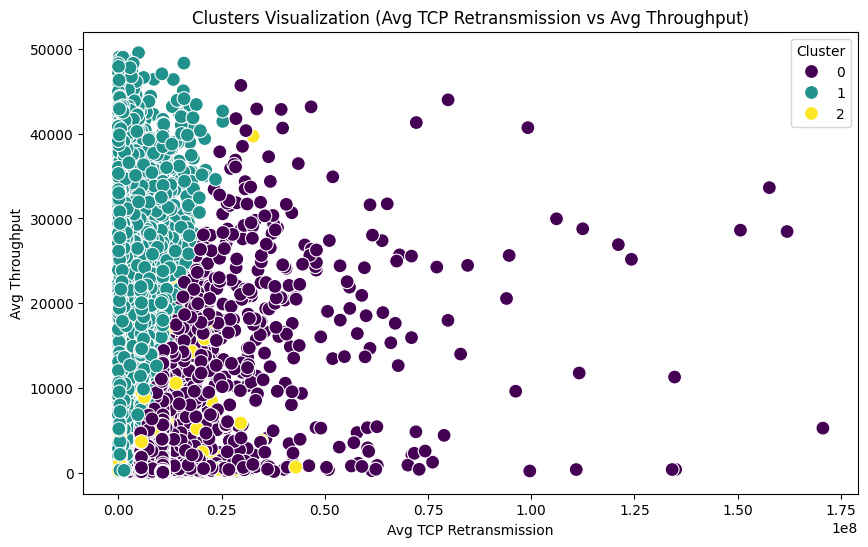

In [21]:
experienceData.kmeans_clustering(aggregatedData)